
 Round 1

 Simulating Market Round...

 Market Event: None
TechCorp [Bear] rolls 2.0, changes by -133.33
EcoPower [Bear] rolls 6.0, changes by 288.00
GovBond 10Y [Bull] rolls 4.0, changes by 152.00
Gold Futures [Bull] rolls 6.0, changes by 306.00
BitNova [Bull] rolls 6.0, changes by 792.00

 Diversification Bonuses:

 Prices After Round:
TechCorp: $1.00
EcoPower: $378.00
GovBond 10Y: $247.00
Gold Futures: $391.00
BitNova: $902.00

 Round 2

 Simulating Market Round...

 Market Event: None
TechCorp [Bear] rolls 6.0, changes by -400.00
EcoPower [Bull] rolls 5.0, changes by -360.00
GovBond 10Y [Neutral] rolls 6.0, changes by 190.00
Gold Futures [Bull] rolls 5.0, changes by 255.00
BitNova [Bull] rolls 6.0, changes by 792.00

 Diversification Bonuses:

 Prices After Round:
TechCorp: $1.00
EcoPower: $18.00
GovBond 10Y: $437.00
Gold Futures: $646.00
BitNova: $1694.00

 Round 3

 Simulating Market Round...

 Market Event: None
TechCorp [Bull] rolls 6.0, changes by 600.00
EcoPower [Bull] rolls

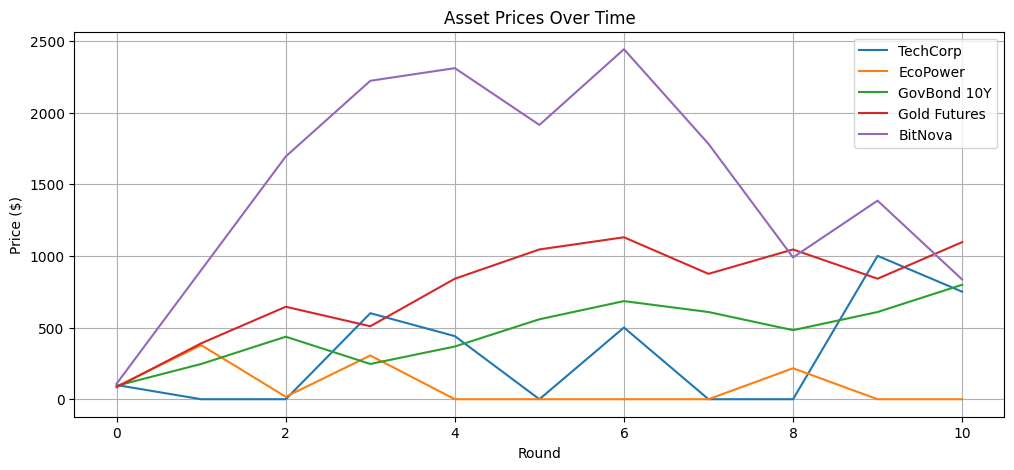

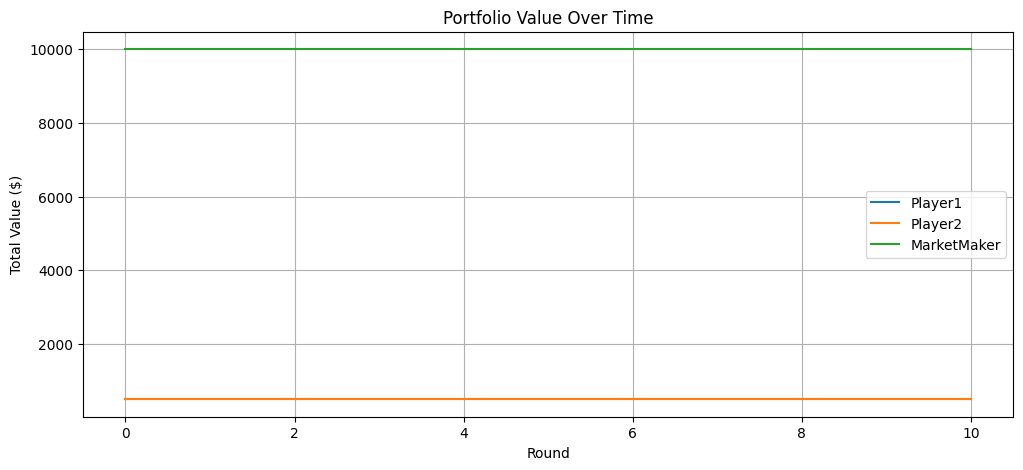

In [1]:
import sys
sys.path.append('../src')  # to import from /src

from asset_classes import StockCard, BondCard, CommodityCard, CryptoCard
from order_book import OrderBook
from market_simulation import run_simulation_round
from portfolio import Portfolio

import matplotlib.pyplot as plt

# Step 1: Create assets
assets = [
    StockCard("TechCorp", base_price=100, volatility=5, sector="Technology"),
    StockCard("EcoPower", base_price=90, volatility=4, sector="Energy"),
    BondCard("GovBond 10Y", base_price=95, volatility=2, duration=10, yield_percent=1.5),
    CommodityCard("Gold Futures", base_price=85, volatility=3, reacts_to="Recession"),
    CryptoCard("BitNova", base_price=110, volatility=6)
]

# Step 2: Initialize order book and portfolios
orderbook = OrderBook()
portfolios = {
    "Player1": Portfolio("Player1", initial_cash=500),
    "Player2": Portfolio("Player2", initial_cash=500),
    "MarketMaker": Portfolio("MarketMaker", initial_cash=9999)
}

# Step 3: Track asset prices and portfolio values over time
price_history = {asset.name: [asset.current_price] for asset in assets}
portfolio_value_history = {pid: [pf.get_total_value({a.name: a.current_price for a in assets})] for pid, pf in portfolios.items()}

# Step 4: Simulate 10 market rounds
for round_num in range(10):
    print(f"\n Round {round_num + 1}")

    # Run the simulation round
    run_simulation_round(assets, orderbook, portfolios)

    # Save price history
    for asset in assets:
        price_history[asset.name].append(asset.current_price)

    # Save portfolio values
    for pid, pf in portfolios.items():
        portfolio_value_history[pid].append(pf.get_total_value({a.name: a.current_price for a in assets}))

# Step 5: Plot asset price movements
plt.figure(figsize=(12, 5))
for name, history in price_history.items():
    plt.plot(history, label=name)
plt.title("Asset Prices Over Time")
plt.xlabel("Round")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Plot portfolio values over time
plt.figure(figsize=(12, 5))
for pid, history in portfolio_value_history.items():
    plt.plot(history, label=pid)
plt.title("Portfolio Value Over Time")
plt.xlabel("Round")
plt.ylabel("Total Value ($)")
plt.legend()
plt.grid(True)
plt.show()
